In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def regressao_linear(X, y):
    # Verifica se X é uma array 1D e transforma em 2D (necessário para scikit-learn)
    if len(X.shape) == 1:
        X = X.reshape(-1, 1)
        
    # Inicializa o modelo de regressão linear
    modelo = LinearRegression()
    
    # Ajusta o modelo aos dados
    modelo.fit(X, y)
    
    # Obtém os coeficientes
    coeficiente = modelo.coef_
    intercepto = modelo.intercept_
    r2 = modelo.score(X, y)  # Coeficiente de determinação R^2
    
    return {
        "coeficiente": coeficiente[0],
        "intercepto": intercepto,
        "R2": r2,
    }, modelo


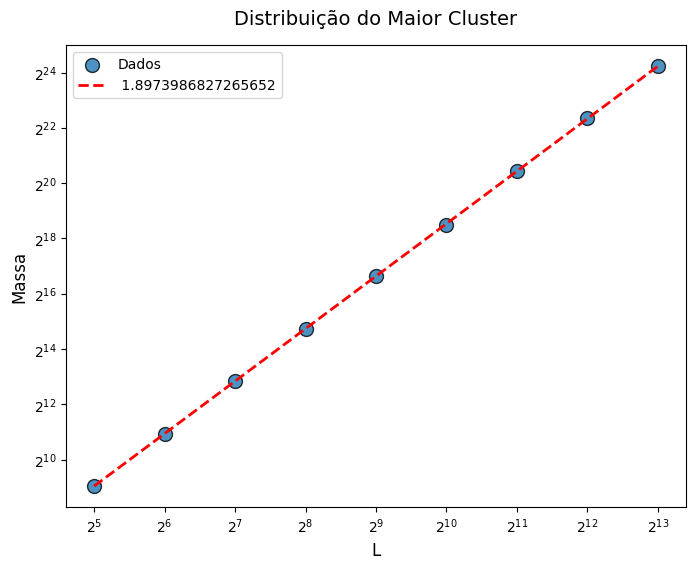

In [43]:
big_cluster = np.loadtxt('./output/big_cluster.txt')
plt.figure(figsize=(8, 6))  # Tamanho do gráfico para melhor visualização
plt.scatter(big_cluster[:, 0], big_cluster[:, 1], s=100, alpha=0.8,edgecolors='k', label="Dados")  # Ponto de dados com opacidade

# Ajustar escalas logarítmicas
plt.xscale('log', base=2)
plt.yscale('log', base=2)
x_log = np.log2(big_cluster[:, 0]).reshape(-1, 1)
y_log = np.log2(big_cluster[:, 1])

# Ajustar os rótulos dos eixos
plt.xlabel('L', fontsize=12)
plt.ylabel('Massa', fontsize=12)
x_fit = np.linspace(min(x_log), max(x_log), 100)
y_fit = modelo.predict(x_fit.reshape(-1, 1))
# Adicionar título
plt.title('Distribuição do Maior Cluster', fontsize=14, pad=15)

df,modelo = regressao_linear(np.log2(big_cluster[:,0]),np.log2(big_cluster[:,1]))
plt.plot(2**x_fit, 2**y_fit, color='red', linestyle='--', linewidth=2, label=f' {df["coeficiente"][0]}')
plt.legend(loc='best')
plt.show()


In [2]:
critical = np.loadtxt('./output/prob_1024.txt')

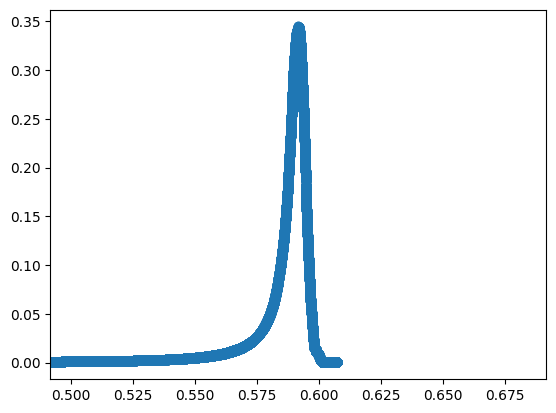

In [3]:
x = (np.arange(len(critical))+1)/(1024*1024)
plt.scatter(x,critical)
m = np.arange(len(critical))[np.argmax(critical)]/(1024*1024)
plt.xlim(m-0.1,m+0.1)
plt.show()
nu = regressao_linear(x[(x>m-0.01) & (x <=m)],critical[(x>m-0.01) & (x <=m)])

In [110]:
nu

({'coeficiente': 32.26029297250415,
  'intercepto': -18.74455558932188,
  'R2': 0.9587623004671862},
 LinearRegression())

In [44]:

clusters = np.loadtxt('./output/clusters_1024.txt')

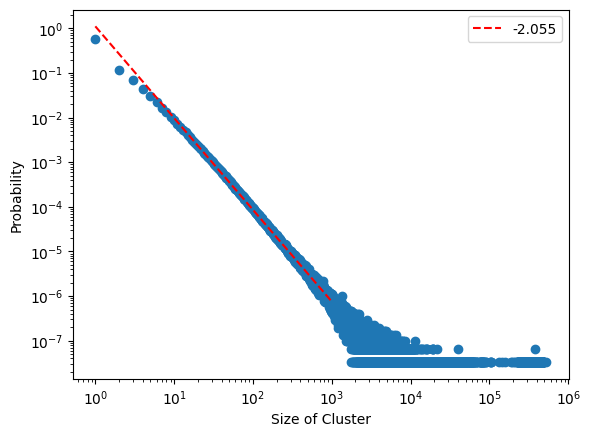

In [68]:
x,y = np.unique(clusters,return_counts = True)
y = y/np.sum(y)

critical,modelo = regressao_linear(np.log10(x[x<1000]),np.log10(y[x<1000]))
plt.scatter(x,y)
plt.plot(x[x<1000], 10**(critical['coeficiente'] * np.log10(x[x<1000]) + critical['intercepto']),'--', color='red',label = np.round(critical['coeficiente'],3))

plt.ylabel('Probability')
plt.xlabel('Size of Cluster')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()
